# Mô tả thuộc tính dữ liệu

- State (Bang): Bang mà khách hàng đang sinh sống.

- Account Length (Thời gian tài khoản): Số ngày mà khách hàng đã là thành viên của công ty.

- Area Code (Mã khu vực): Ba chữ số mã khu vực của số điện thoại của khách hàng.

- International Plan (Kế hoạch quốc tế): Cho biết khách hàng có một kế hoạch quốc tế hay không (Có/Không).

- Voice Mail Plan (Kế hoạch hòm thư thoại): Cho biết khách hàng có một kế hoạch hòm thư thoại hay không (Có/Không).

- Number Vmail Messages (Số lượng tin nhắn thoại): Số lượng tin nhắn thoại mà khách hàng đã nhận.

- Total Day Minutes (Tổng số phút trong ngày): Tổng số phút mà khách hàng đã sử dụng trong ngày.

- Total Day Calls (Tổng số cuộc gọi trong ngày): Tổng số cuộc gọi mà khách hàng đã thực hiện trong ngày.

- Total Day Charge (Tổng chi phí trong ngày): Tổng chi phí cho cuộc gọi thoại trong ngày.

- Total Eve Minutes (Tổng số phút vào buổi tối): Tổng số phút mà khách hàng đã sử dụng vào buổi tối.

- Total Eve Calls (Tổng số cuộc gọi vào buổi tối): Tổng số cuộc gọi mà khách hàng đã thực hiện vào buổi tối.

- Total Eve Charge (Tổng chi phí vào buổi tối): Tổng chi phí cho cuộc gọi thoại vào buổi tối.

- Total Night Minutes (Tổng số phút vào ban đêm): Tổng số phút mà khách hàng đã sử dụng vào ban đêm.

- Total Night Calls (Tổng số cuộc gọi vào ban đêm): Tổng số cuộc gọi mà khách hàng đã thực hiện vào ban đêm.

- Total Night Charge (Tổng chi phí vào ban đêm): Tổng chi phí cho cuộc gọi thoại vào ban đêm.

- Total Intl Minutes (Tổng số phút quốc tế): Tổng số phút quốc tế mà khách hàng đã sử dụng.

- Total Intl Calls (Tổng số cuộc gọi quốc tế): Tổng số cuộc gọi quốc tế mà khách hàng đã thực hiện.

- Total Intl Charge (Tổng chi phí quốc tế): Tổng chi phí cho cuộc gọi quốc tế.

- Customer Service Calls (Số lượng cuộc gọi đến dịch vụ khách hàng): Số lượng cuộc gọi mà khách hàng đã thực hiện đến dịch vụ khách hàng.

- Churn (Rời bỏ): Biến mục tiêu cho biết liệu khách hàng đã rời bỏ (Chấp nhận) hay không (Không chấp nhận).

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score,classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
sns.set_theme()

In [ ]:
train_set = pd.read_csv('churn-bigml-80.csv')
test_set = pd.read_csv('churn-bigml-20.csv')
print(train_set.shape)
print(test_set.shape)

(2666, 20)
(667, 20)


In [ ]:
df_train = train_set.copy()
df_test = test_set.copy()

# DATA MINING

In [ ]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
for col in df_train.columns:
  print(col)
  print(df_train[col].unique())
  print()

State
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']

Account length
[128 107 137  84  75 118 121 147 141  74 168  95  62  85  93  76  73  77
 130 132 174  57  54  20 142 172  12  72  78 136 149  98 135  34 160  64
  59  97  52  60  96  87  81 125 116  38  40  43 113 126 150 138 162  90
  50  82 144  70  55 106  94 111  80 104  99 120 122 157 103  36 112  46
  41 193  61  92 131 163  91 127 110 117 140  83 145  56 151 139 115 146
 185 148  68 179  67  19 170 164  51  63  53 105  66  86  35  88 123 100
 108  22  33 114  24 119 101  49  48  71 167 166 158 196 209  16  39 173
 129 143  89  44  79  31  37 159 194 154  45  32  21 133  25 224  58 155
  11 109 165  18 161 124  30 176  47 190 152  65 186 171 102  28 153 169
  13  42 189  69  27 134 156 243  23 205 200   5   9 178 181 

In [ ]:
df_train.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

- **Quan sát sơ bộ về dữ liệu**


1.   Train set có 2666 dòng và 20 features.
2.   Không tồn tại null trong bộ dữ liệu, dữ liệu là những biến rời rạc.
3. Các biến có thể xem là Categorical bao gồm: 'State', 'International plan', 'Voice mail plan', 'Area code', 'Churn'. Các biến như 'Area code' ở dạng number và 'Churn' ở dạng boolean, tuy nhiên về mặt phân tích sẽ giống với cách phân tích categorical variable.
4. Các biến còn lại ở dạng number sẽ được phân tích tương tự nhau.



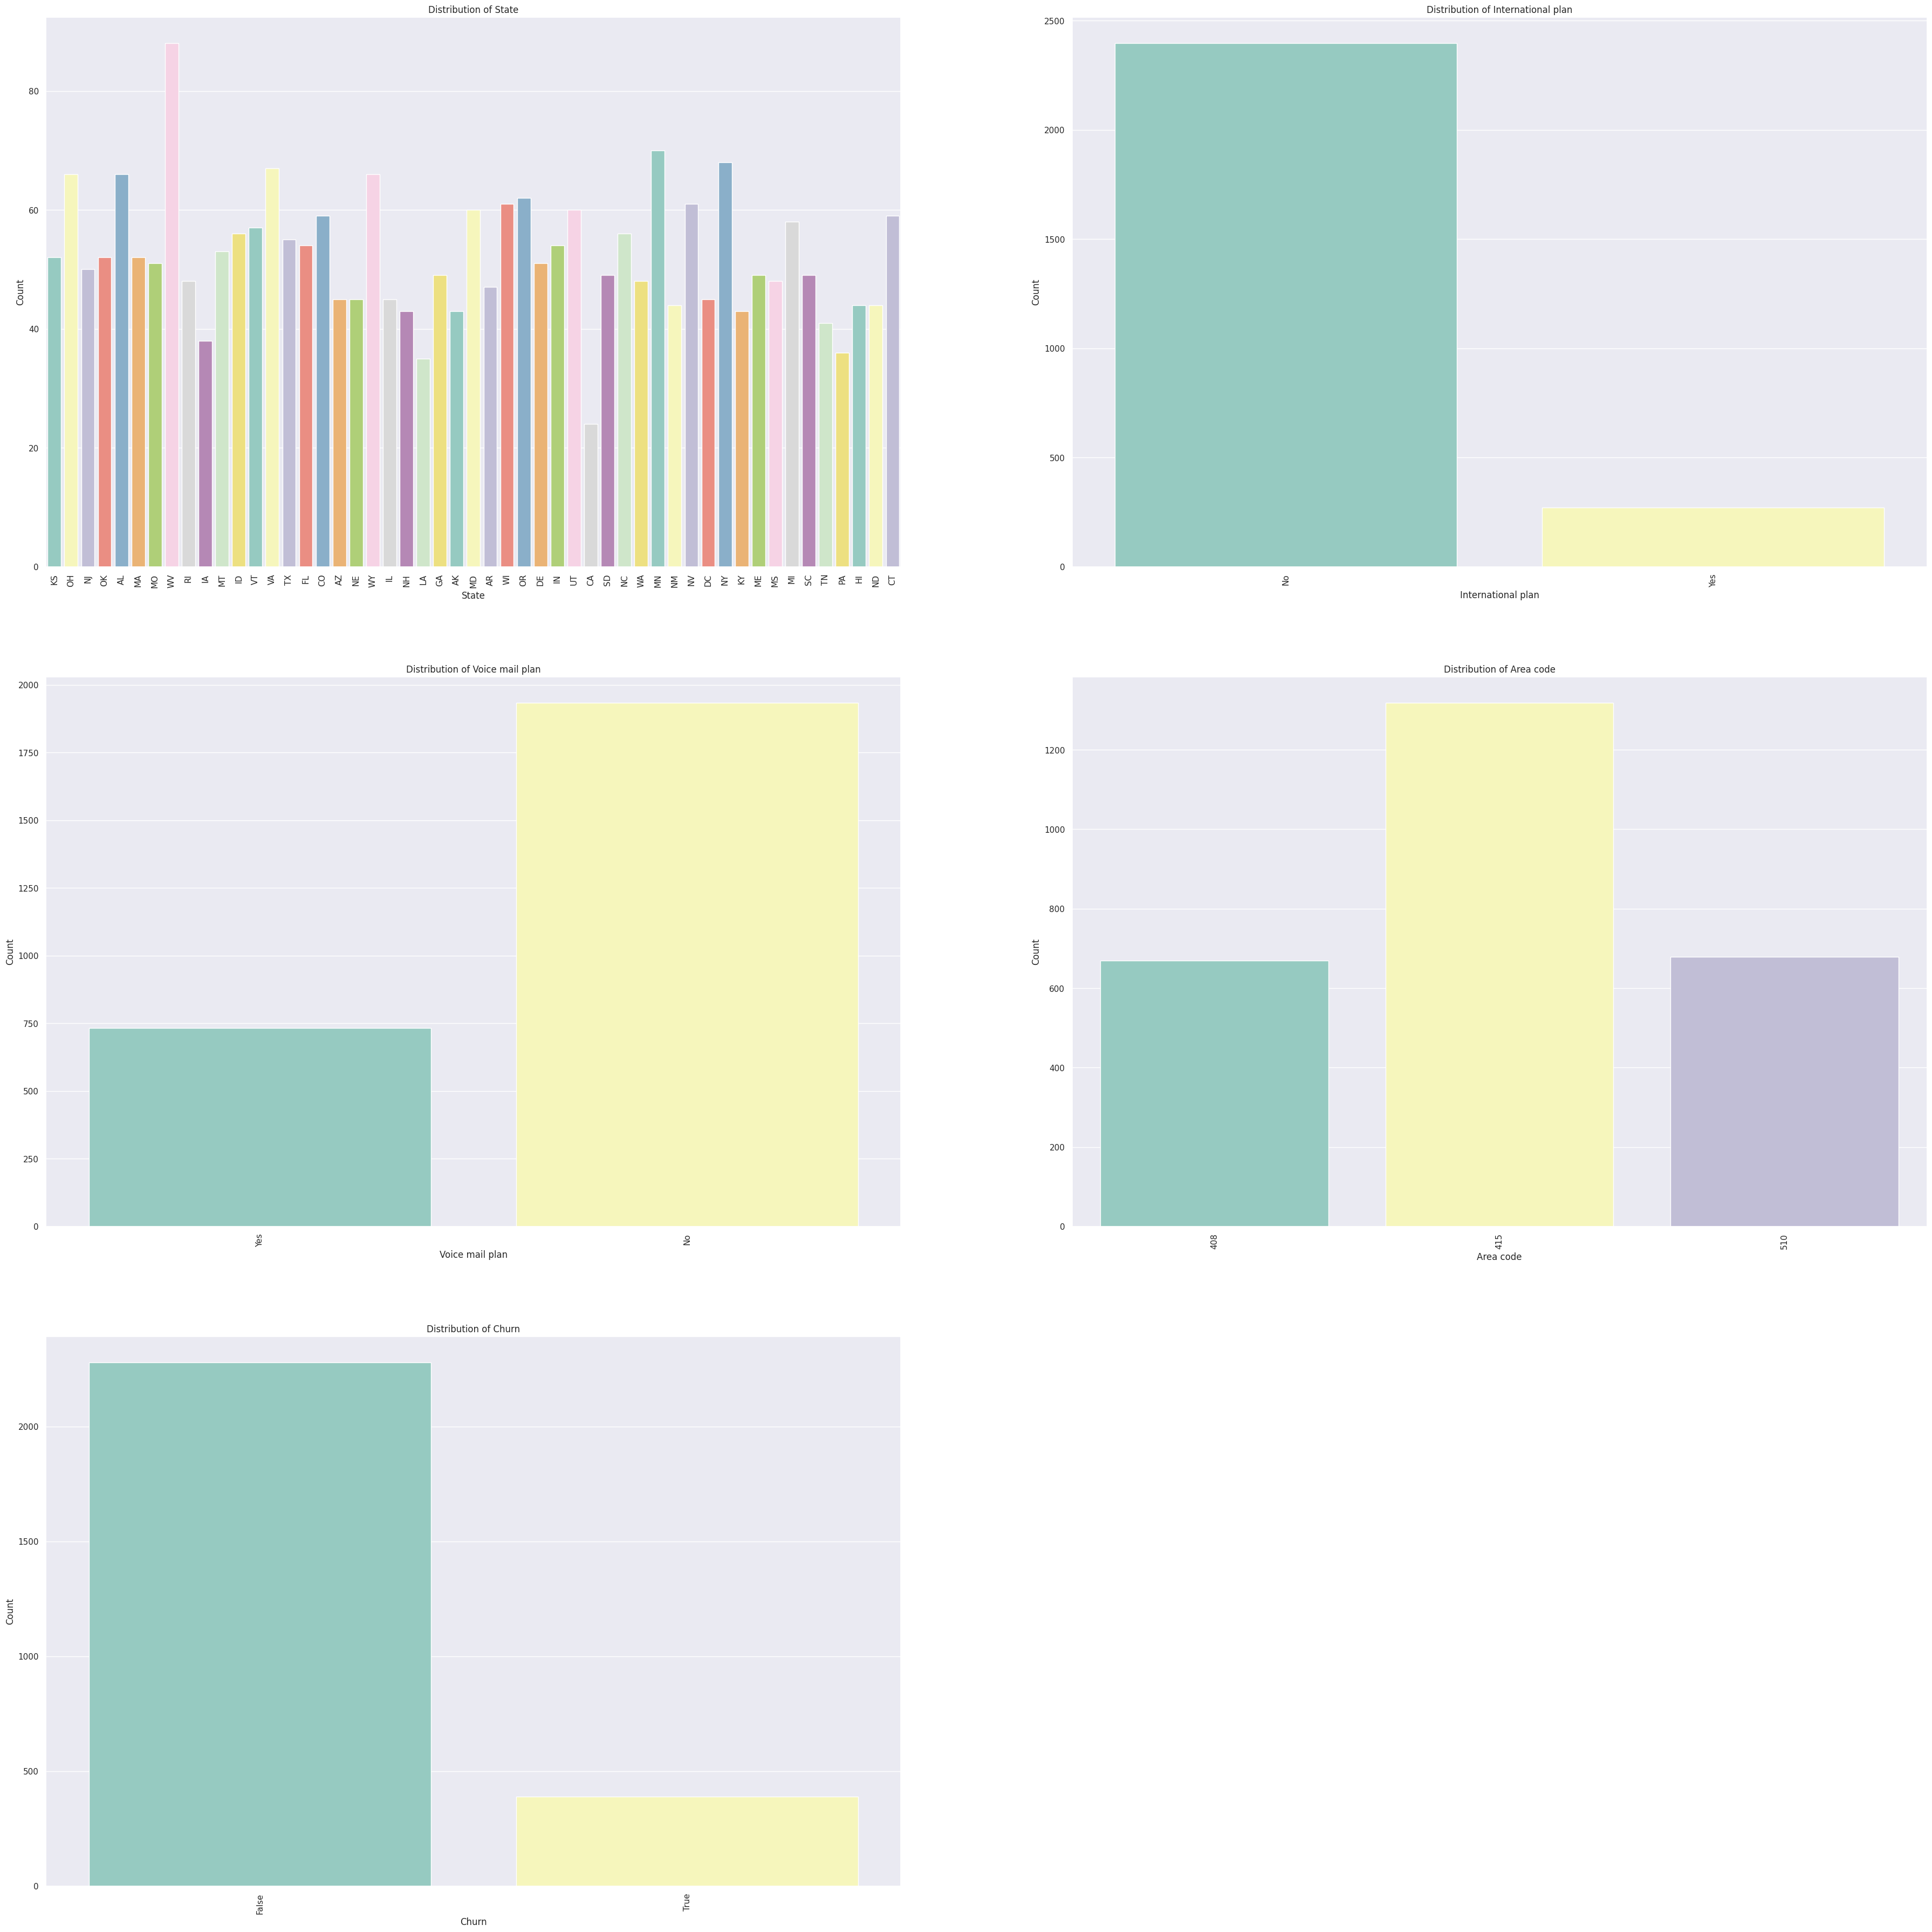

In [ ]:
categorical_col = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']
num_rows_cat = (len(categorical_col) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_col):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.countplot(data=df_train, x=attr, palette='Set3')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

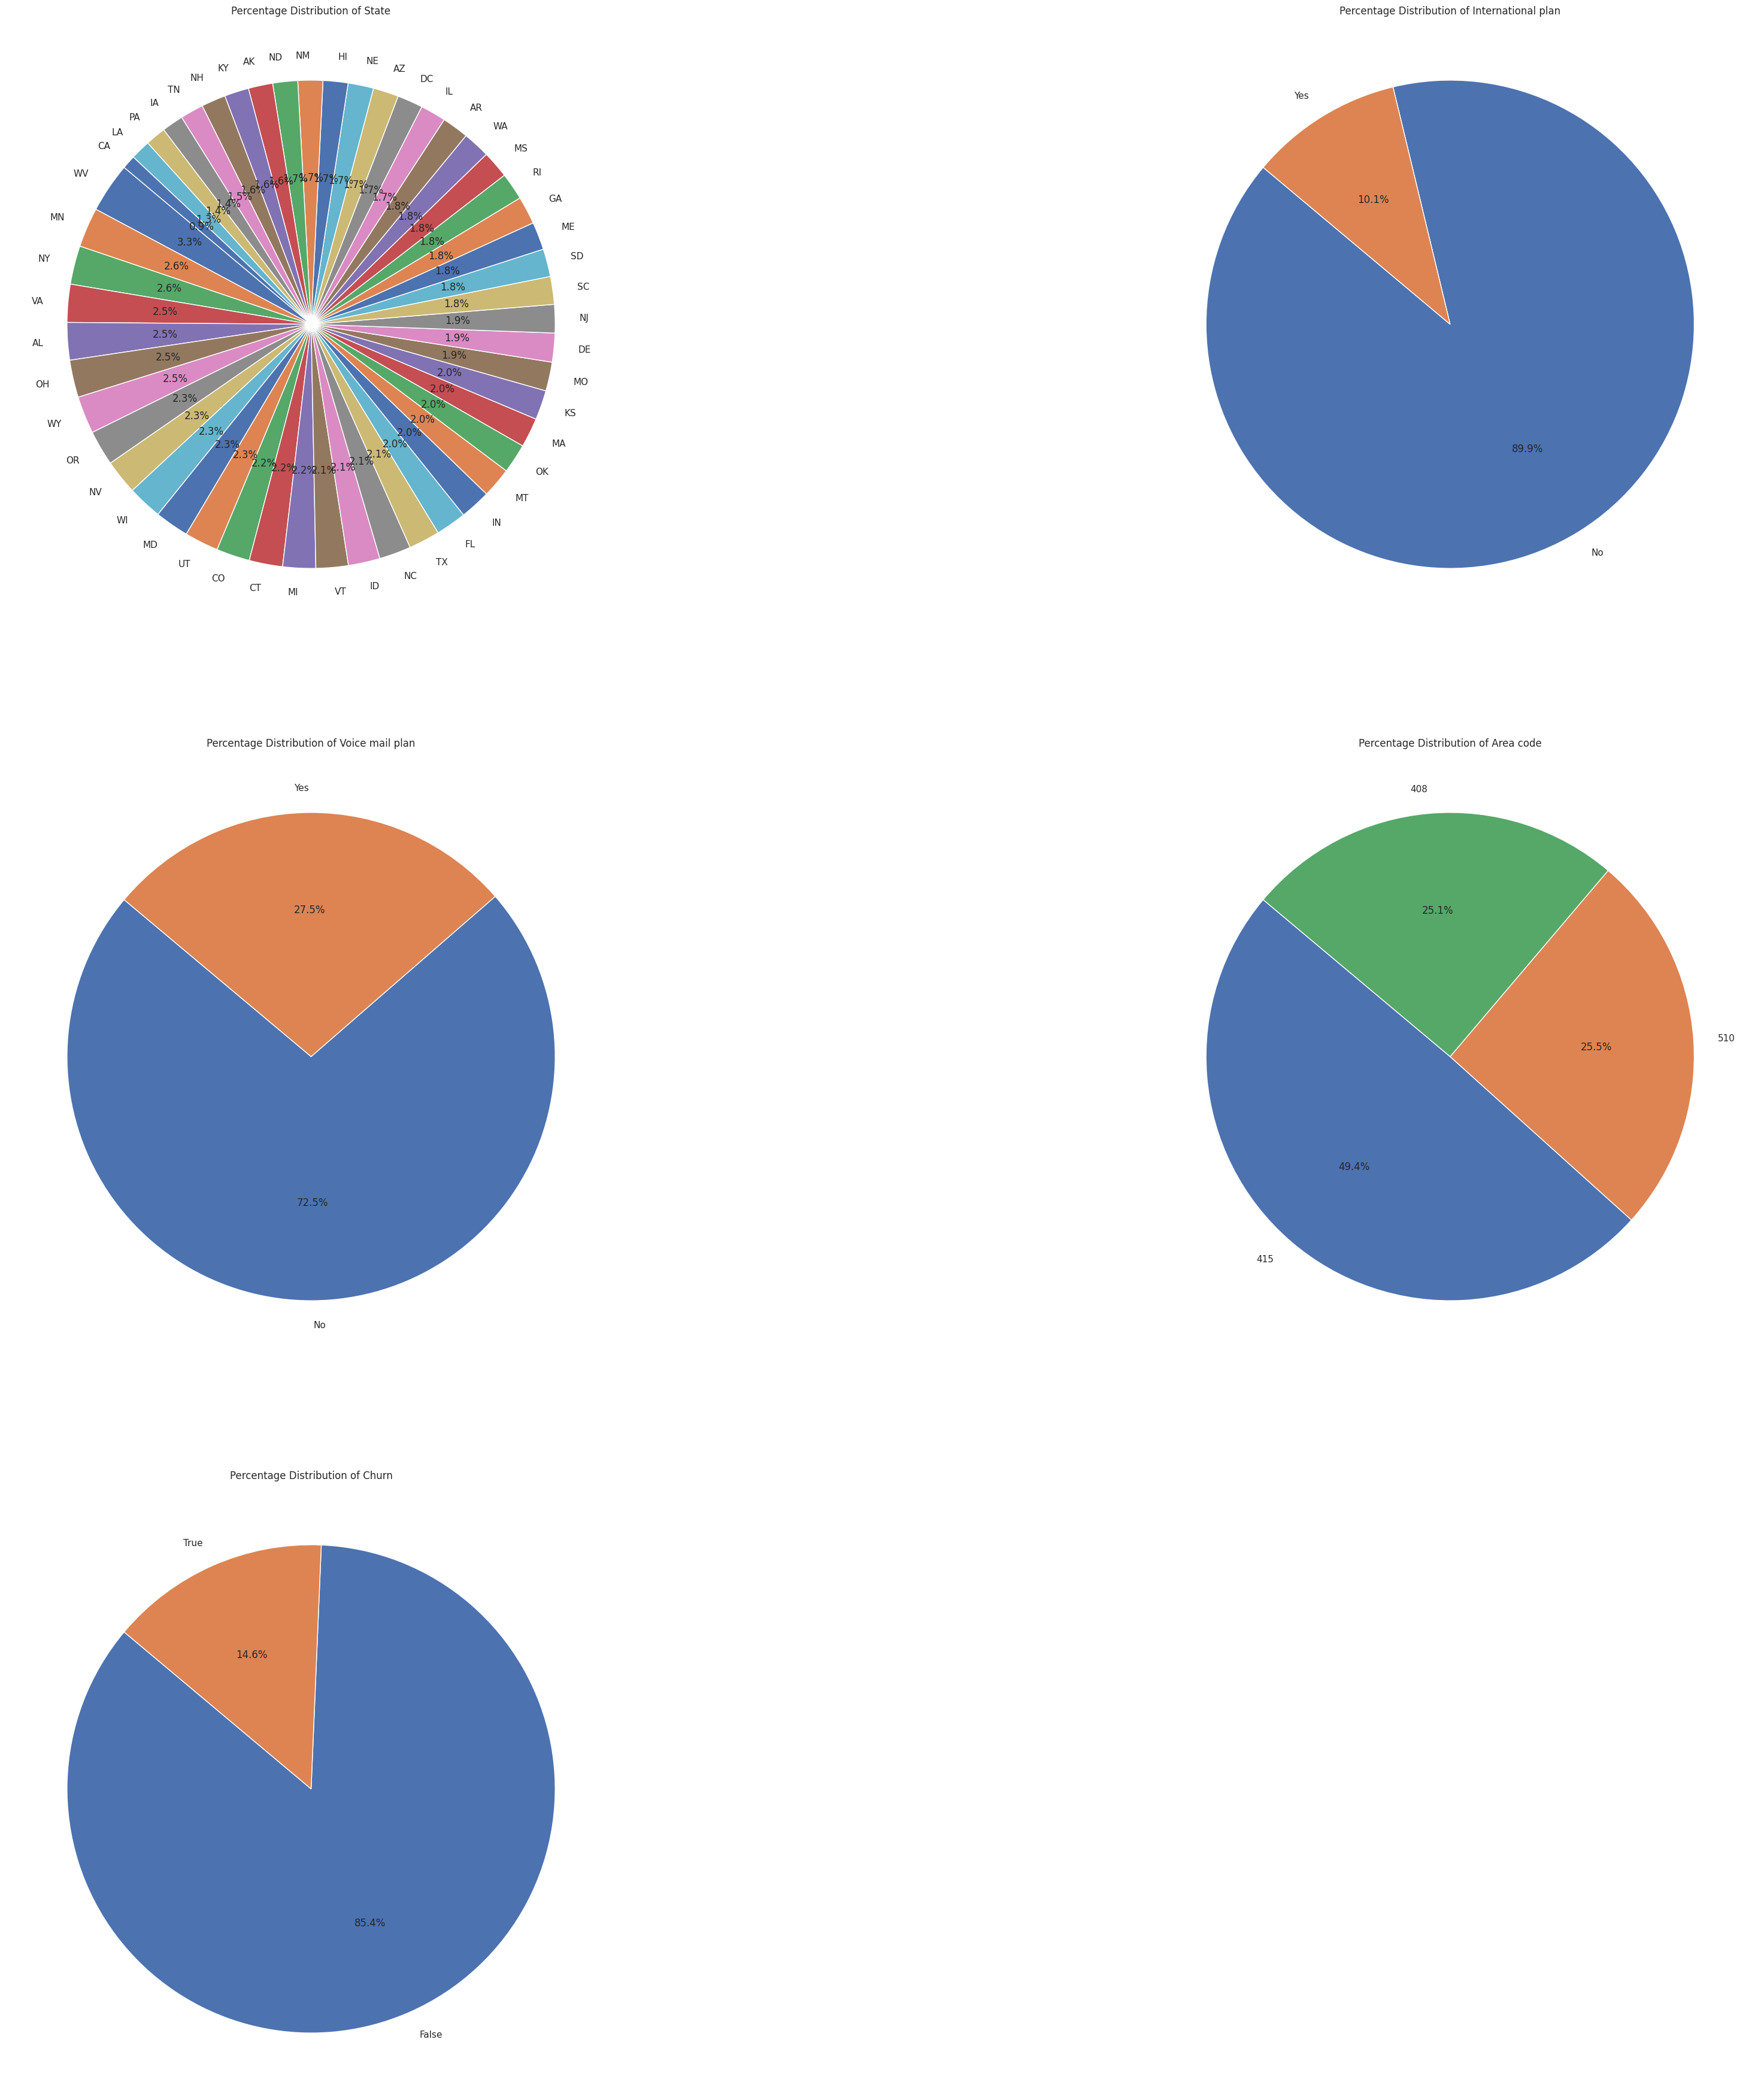

In [ ]:
# Lặp qua từng cột (ngoại trừ 'Churn' vì đây là biến mục tiêu)
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_col):
    # Tính phần trăm của mỗi giá trị trong cột
    value_counts = df_train[attr].value_counts(normalize=True) * 100
    plt.subplot(num_rows_cat, 2, i + 1)
    # Vẽ biểu đồ tròn
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage Distribution of {attr}')
    plt.xticks(rotation=90)

**Thông qua biểu đồ, có một số nhận xét sau**

> - Dữ liệu phân bố đều ở các vùng, nhiều nhất là ở WV và ít nhất ở CA
- Rất ít người dùng có plan quốc tế (Định cư hoặc du học, làm việc ở nước ngoài)
- 72.5% khách hàng thường không có kế hoạch voice email
- Khách hàng có mã vùng 415 sử dụng dịch vụ nhiều nhất (49.4%), 2 vùng 408 và 510 gần ngang bằng nhau ở mức 25% trên tổng số
- Phần trăm khách hàng lựa chọn ngừng sử dụng dịch vụ của công ty là: 14.6% (khá ít)



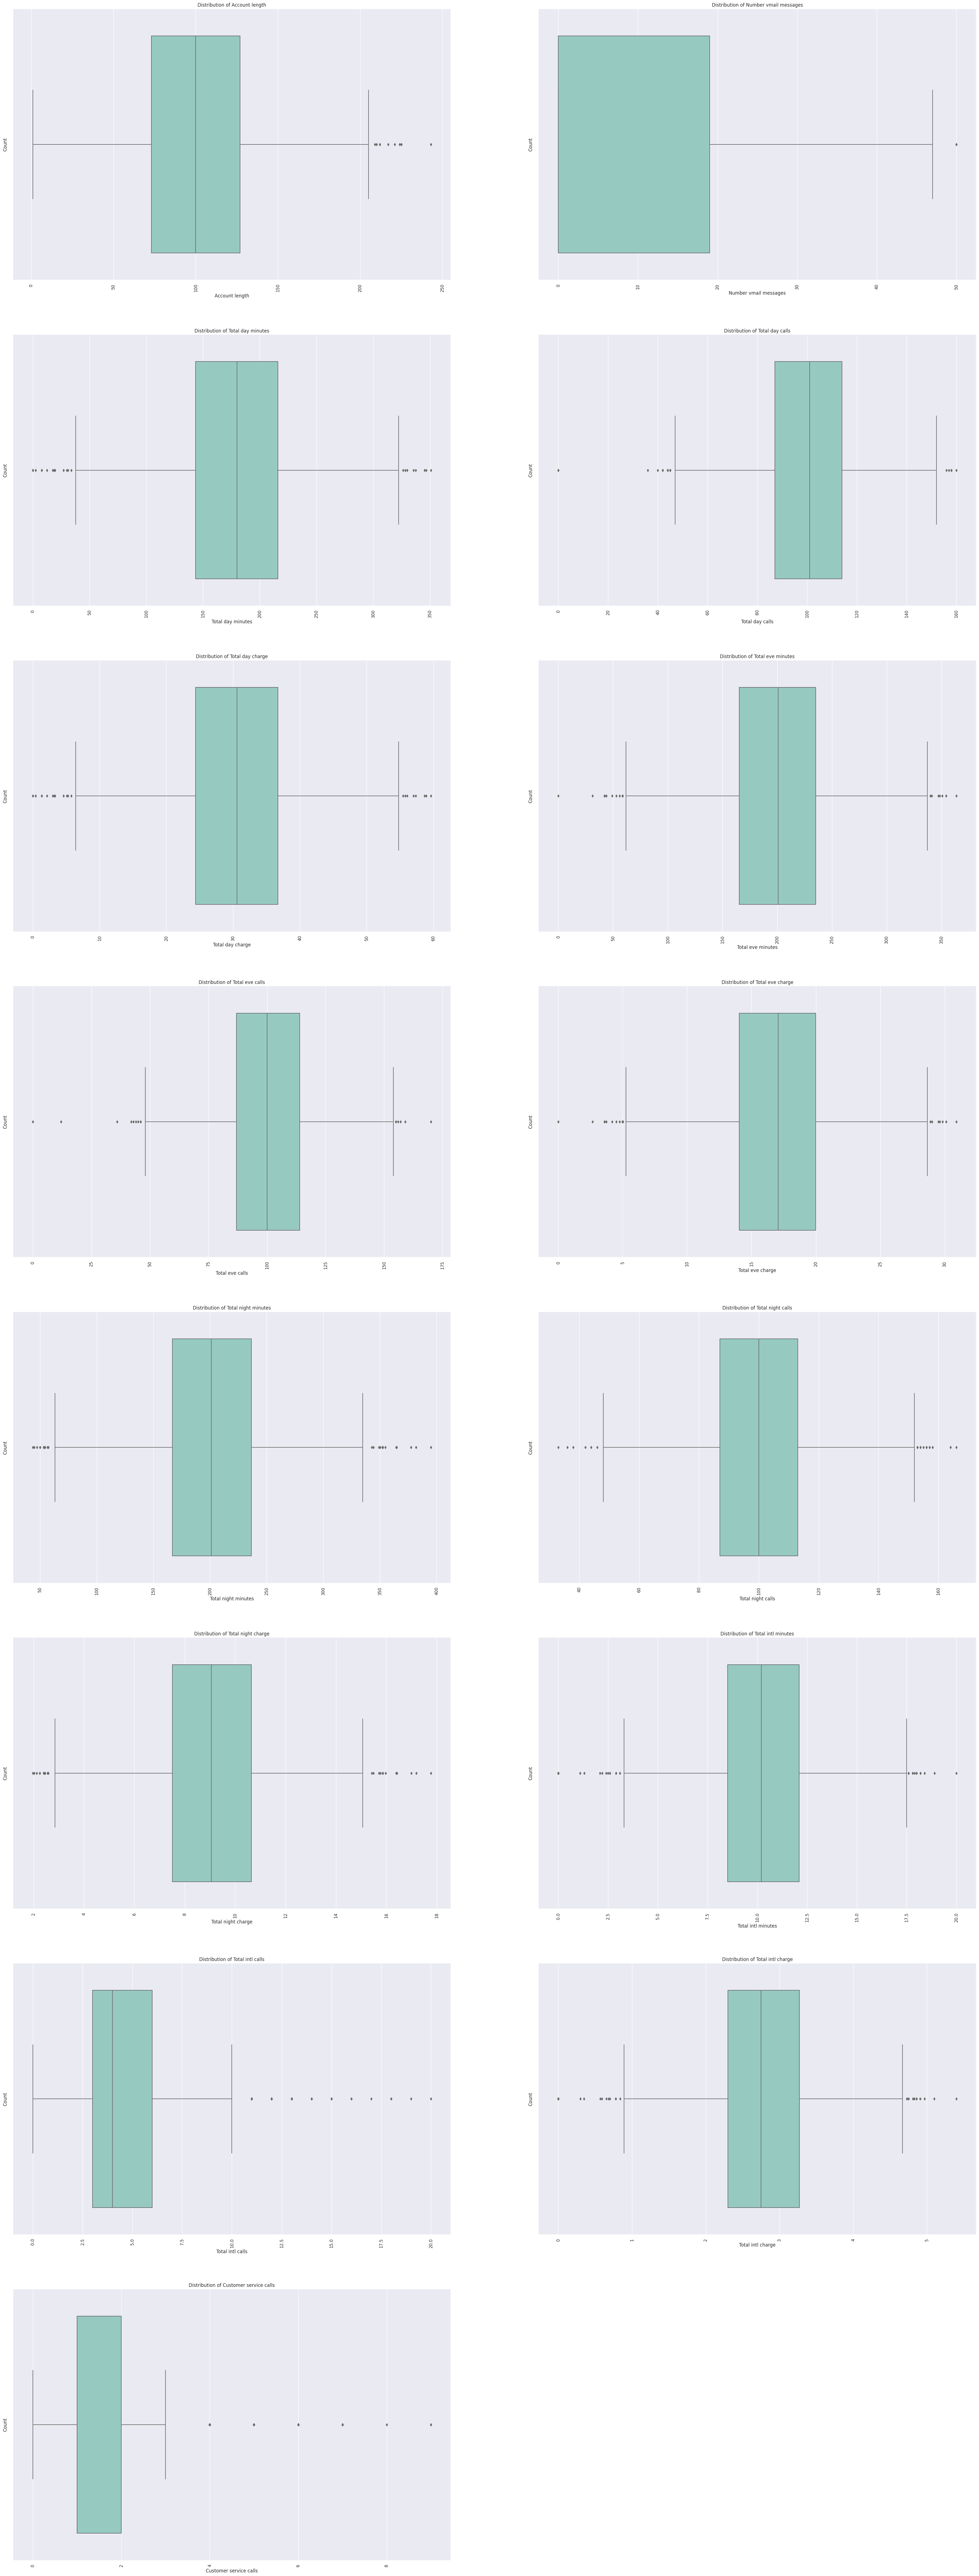

In [ ]:
numerical_col = [col for col in df_train.drop(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn'], axis = 1).columns]
num_rows_cat = (len(numerical_col) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(numerical_col):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.boxplot(data=df_train, x=attr, palette='Set3')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

Dựa vào biểu đố phân tán dữ liệu, có một số nhận xét sau


> - Khách hàng thường sử dụng dịch vụ công ty trong khoảng 2 tháng đến hơn 4 tháng (70 - 125 ngày)
- Số lượng voice email mà khách hàng nhận đa số rơi vào khoảng dưới 20
- Đa số khách hàng sử dụng dịch vụ mỗi ngày từ 140 đến 220 phút
- Đa số khách hàng thực hiện khoảng trên 85 đến 115 cuộc gọi mỗi ngày
- Tổng chi phí cuộc gọi ban đêm của khách hàng đa số rơi vào khoảng 7 đến 11
- Tổng thời gian của các cuộc gọi quốc tế mà khách hàng đã gọi là 8.5 đến 12 phút.
- Số lượng cuộc gọi quốc tế mà khách hàng gọi thường là
3 đến 6
- Đa số chi phí cho các cuộc gọi quốc tế rơi vào 2 đến hơn 3 đô.
- Khách hàng thường gọi 1 đến 2 lần vào dịch vụ chăm sóc khách hàng của công ty





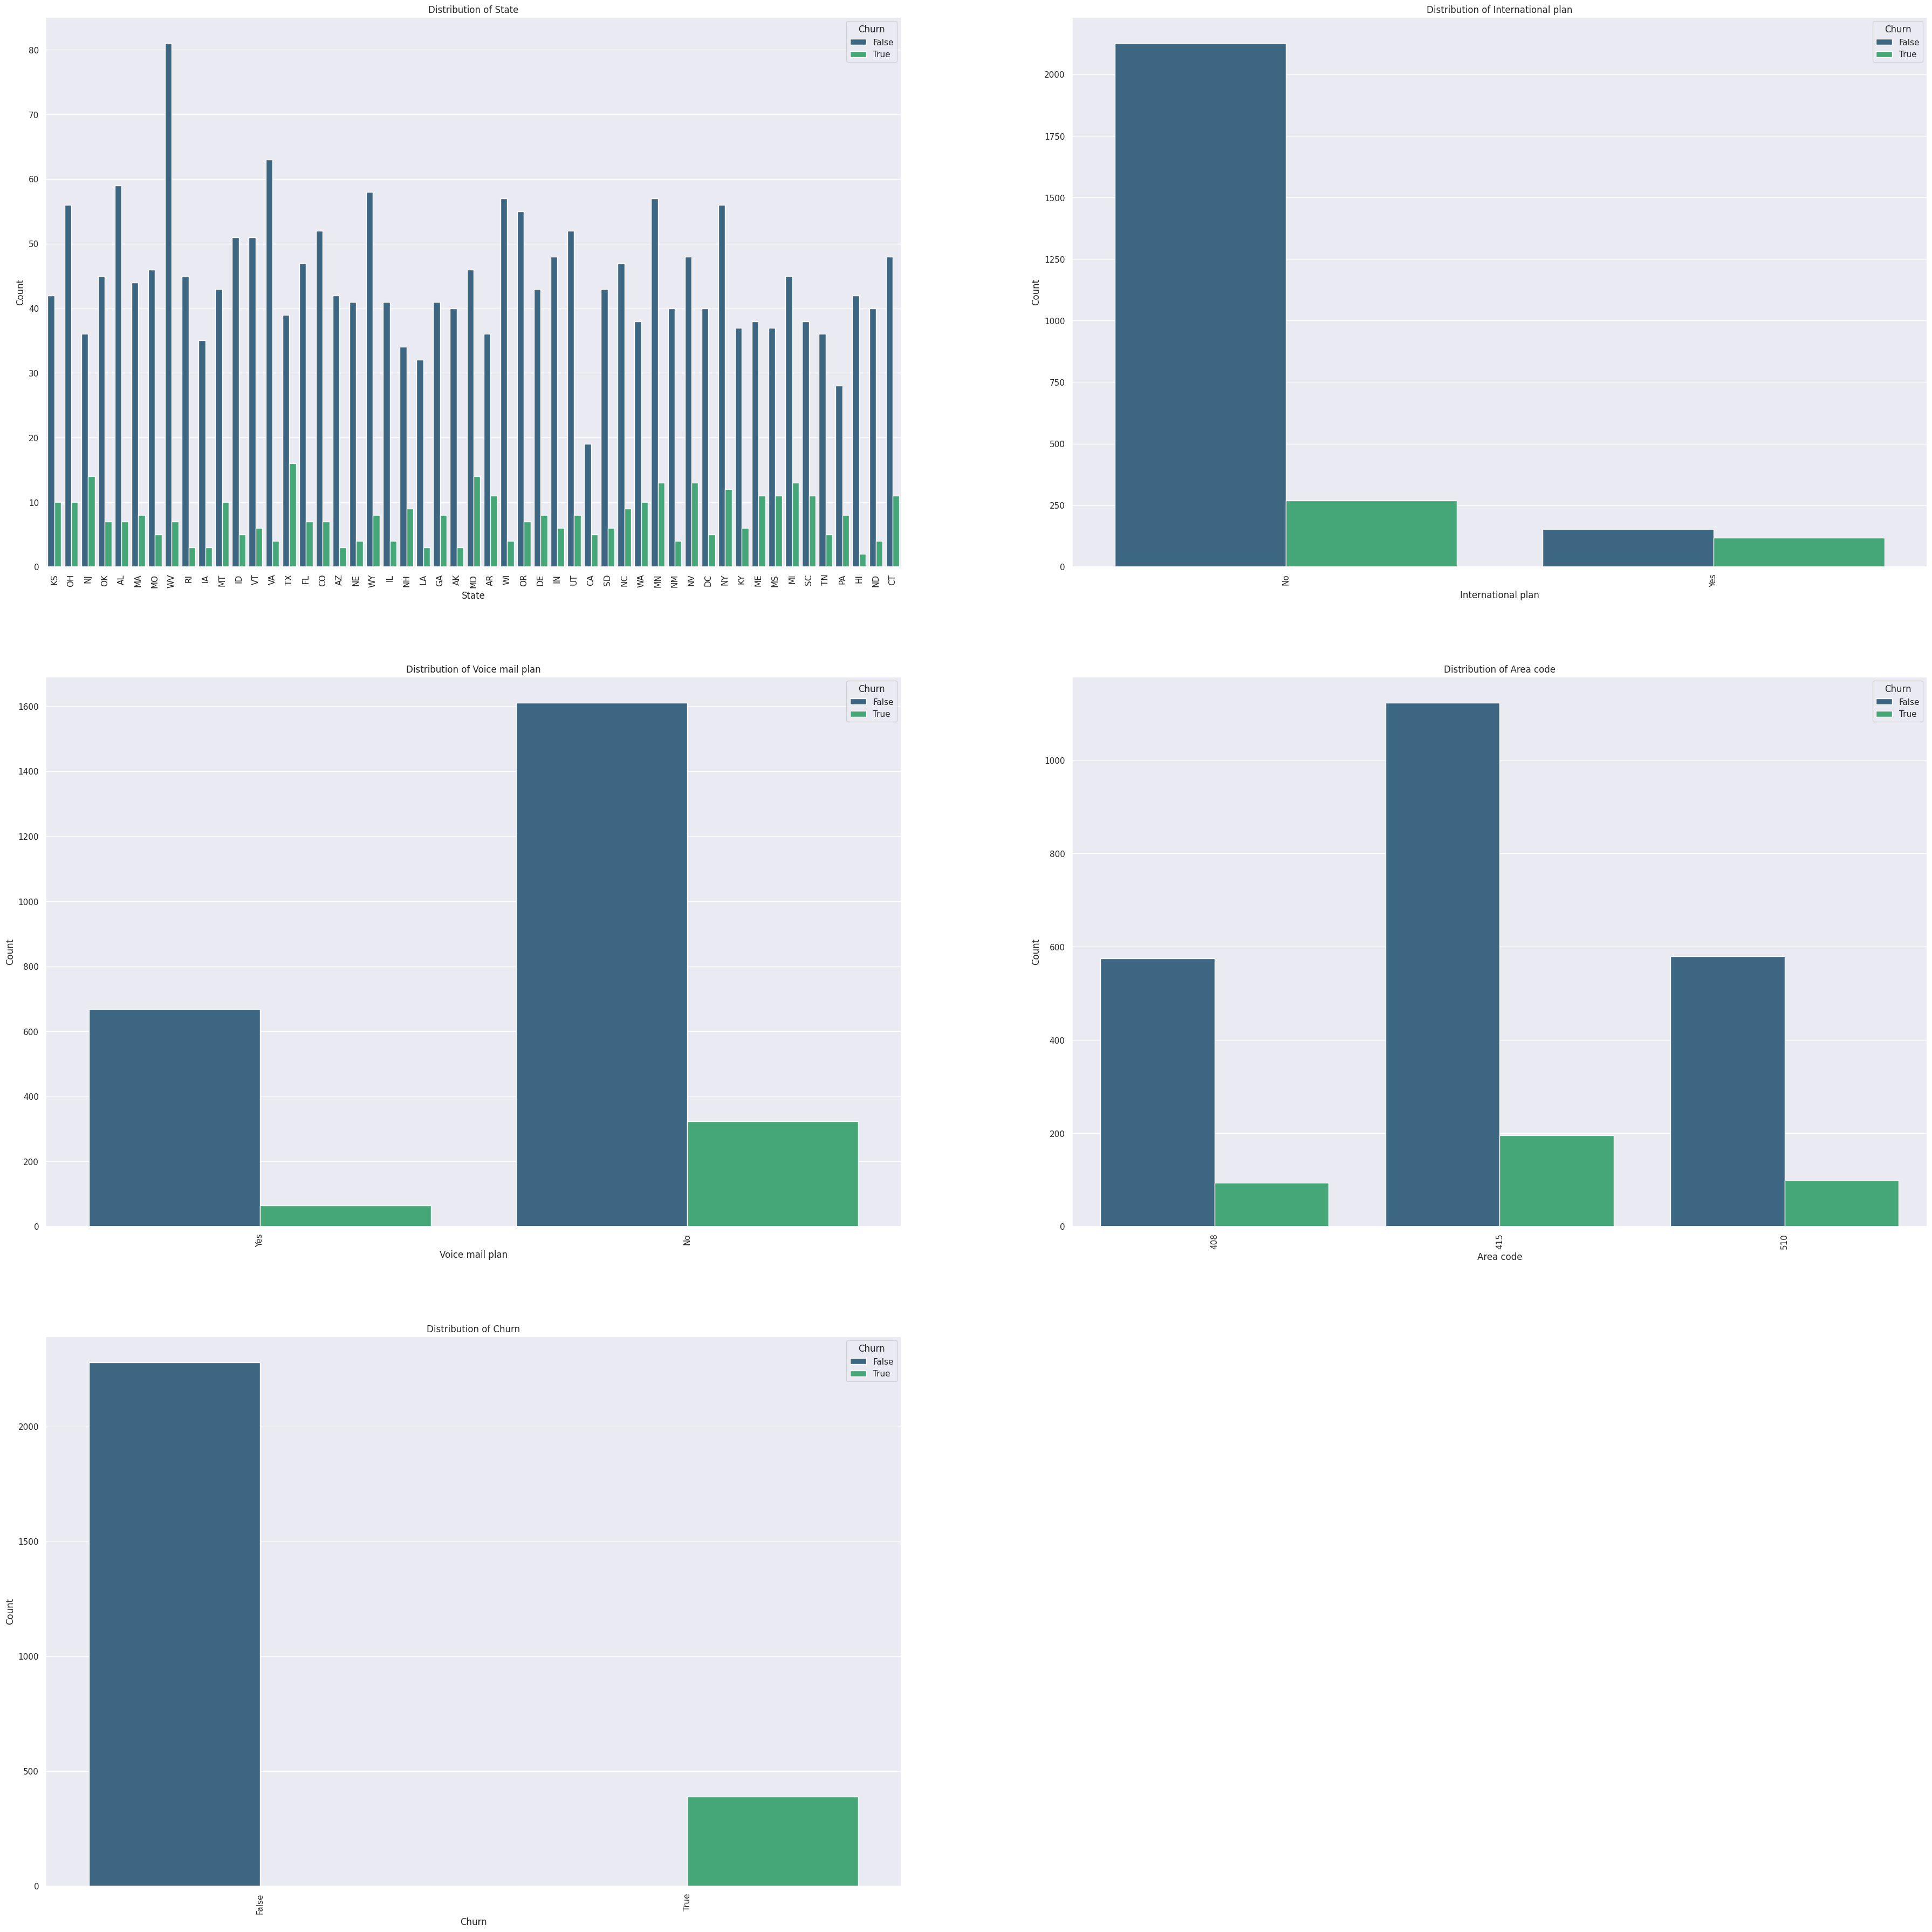

In [ ]:
categorical_col = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']
num_rows_cat = (len(categorical_col) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_col):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.countplot(data=df_train, x=attr, hue='Churn', palette='viridis')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

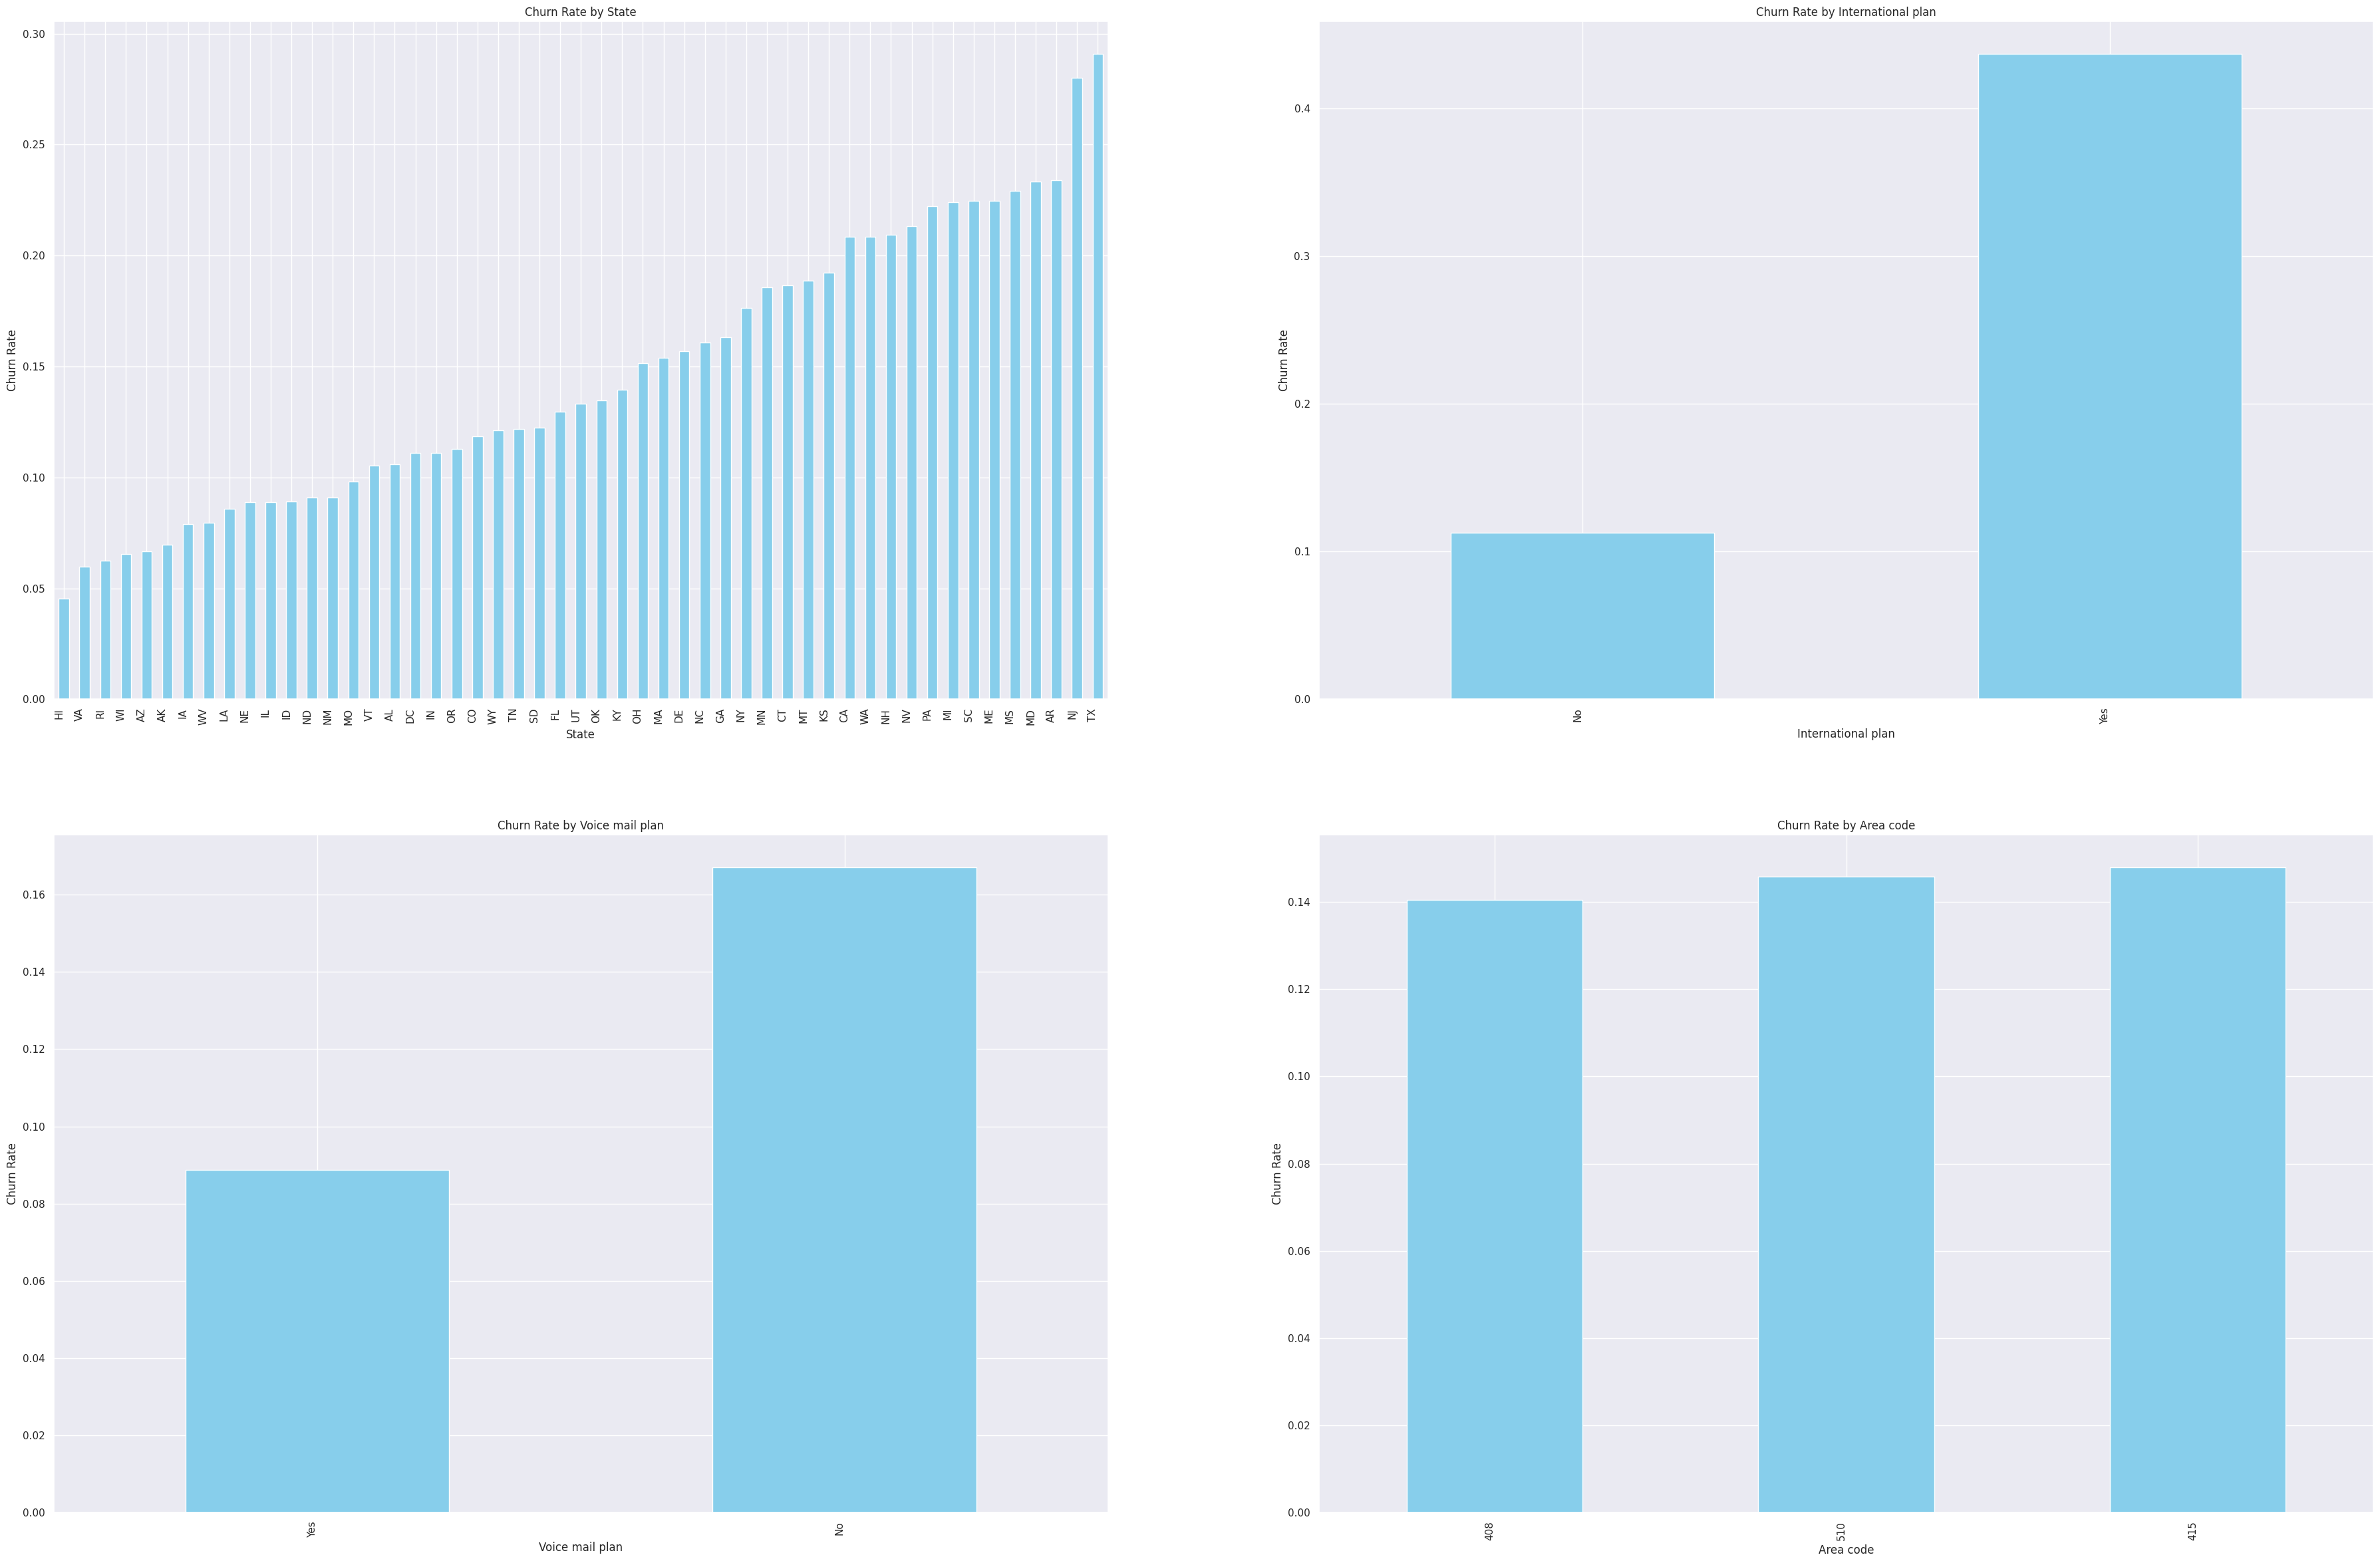

In [ ]:
categorical_col.remove('Churn')
# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_col):
    # Groupby State và tính tỷ lệ rời bỏ trong mỗi bang
    churn_rate = df_train.groupby(attr)['Churn'].mean().sort_values()
    plt.subplot(num_rows_cat, 2, i + 1)
    churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f'Churn Rate by {attr}')
    plt.xlabel(f'{attr}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.xticks(rotation=90)

**Kết quả của quá trình khai phá**
> - Các khu vực có tỷ lệ rời bỏ dịch vụ của công ty ít nhất là: HI, VA, RI, WI, AZ. Khu vực có tỷ lệ rời bỏ nhiều nhất là: TX, NJ, AR, MD, MS
- Khoảng gần 1/2 khách hàng có kế hoạch quốc tế thì sẽ rời bỏ dịch vụ(khoảng trên 40%)
- Tỷ lệ người rời bỏ dịch vụ trên từng mã vùng gần bằng nhau
- Tỷ lệ khách hàng rời bỏ nếu họ không nhận được email voice nhiều gấp đôi so với tỷ lệ khách hàng rời bỏ nếu họ nhận được email voice (tổng thể tương đối ít)

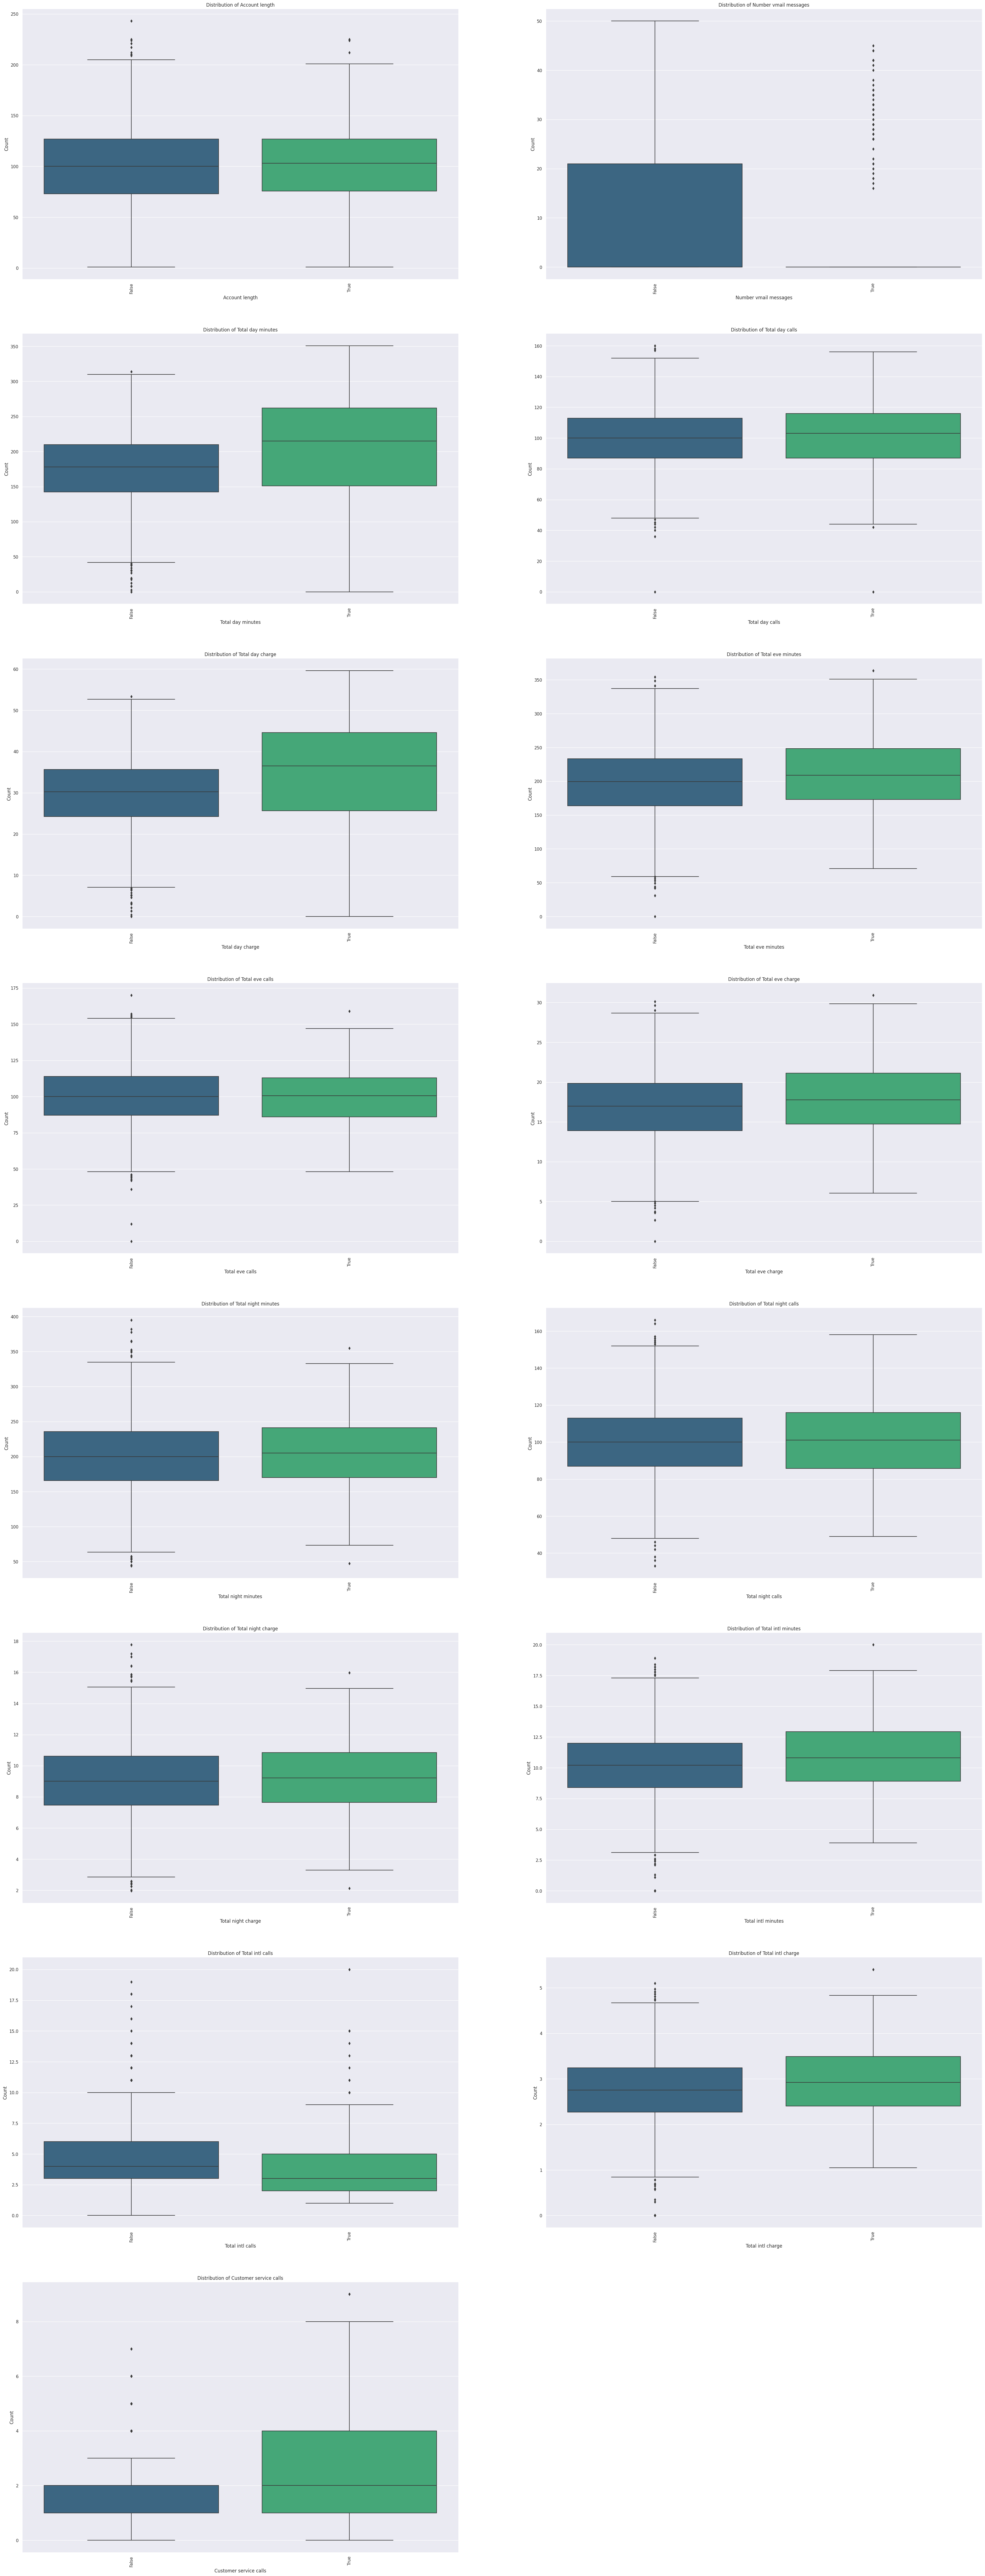

In [ ]:
numerical_col = [col for col in df_train.drop(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn'], axis = 1).columns]
num_rows_cat = (len(numerical_col) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(numerical_col):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.boxplot(data=df_train, x='Churn', y=attr, palette='viridis')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

**Quan sát biến numerrical**
> - Các biến có khả năng không anh hưởng đến kết quả có thể là: 'Account Length', 'Total day calls', 'Total eve calls', 'Total night minutes', 'Total night charge'.
- Một số biển ảnh hưởng không rõ ràng: 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night calls', 'Total int minutes', 'Total int calls', 'Total int charge'
- Các biến có ảnh hưởng rõ rệt đến kết quả: 'Number vemail messages', 'Customer service calls'

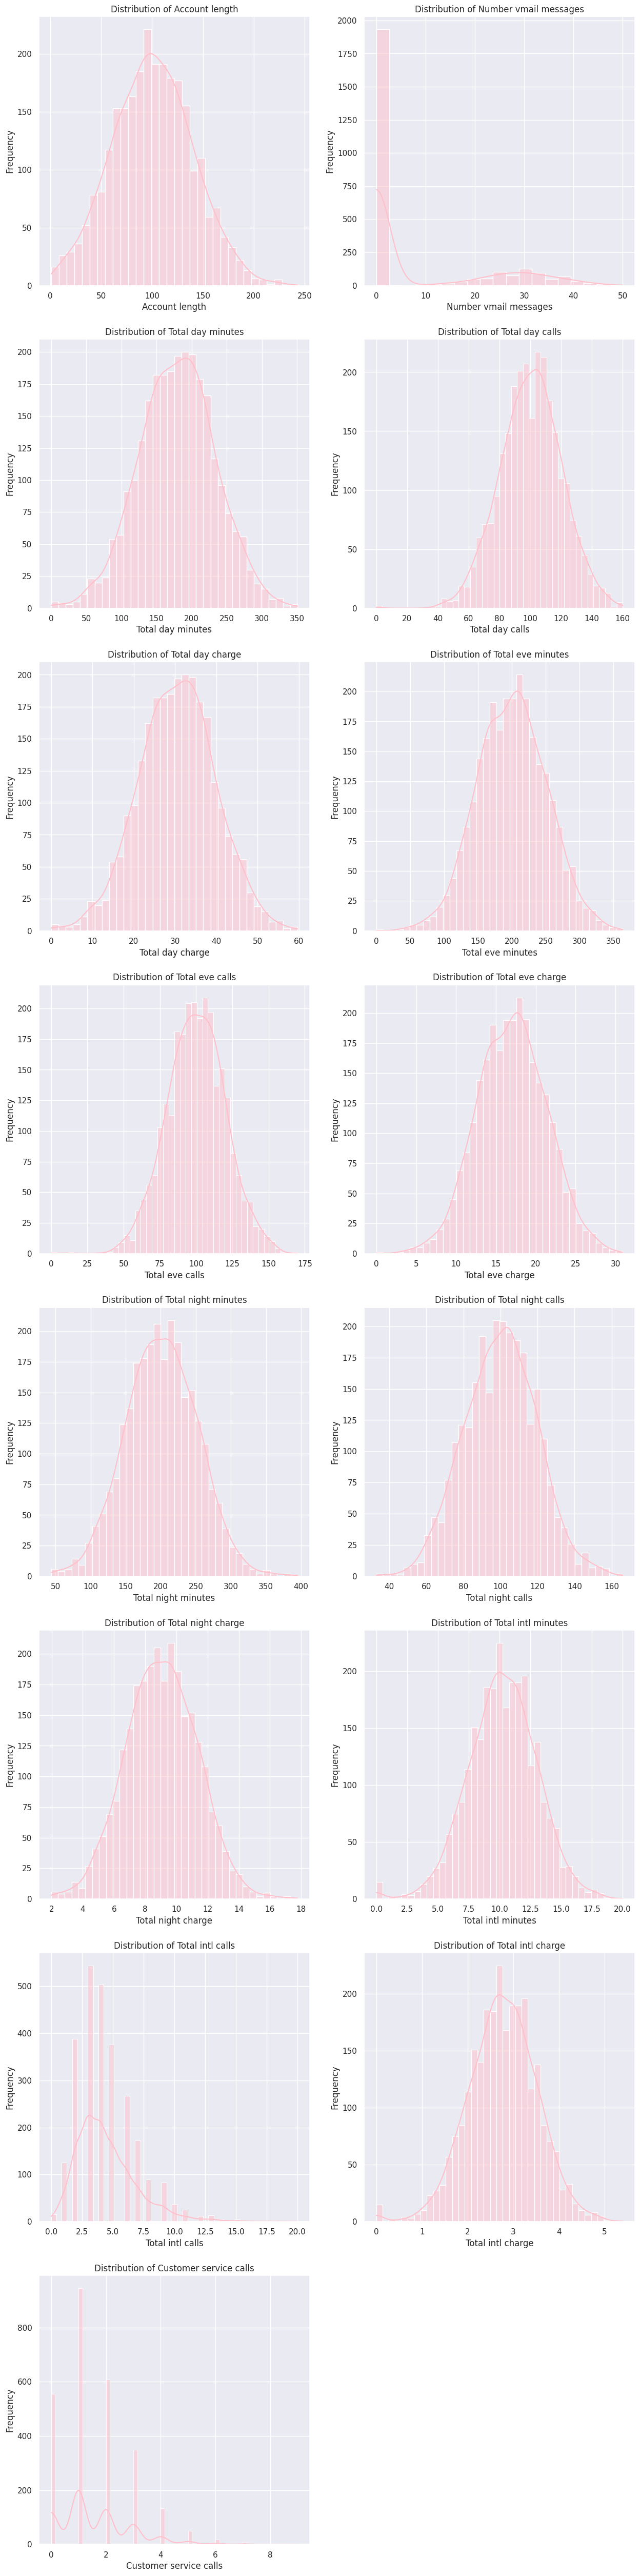

In [ ]:
#The distribution of both numerical and categorical attributes
num_rows_num = (len(numerical_col) - 1) // 2 + 1

# Create subplots for numerical attributes
plt.figure(figsize=(15, 8 * num_rows_num))
for i, attr in enumerate(numerical_col):
    plt.subplot(num_rows_num, 2, i + 1)
    sns.histplot(df_train[attr], kde=True, color='Pink')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attr}')

# DATA PROCESSING

- ENCODER

In [ ]:
categorical_col = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']

# Create a dictionary to store mappings
label_mappings = {}

for col in categorical_col:
    label_encoder = LabelEncoder()
    df_train[col] = label_encoder.fit_transform(df_train[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for State: {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
Mapping for International plan: {'No': 0, 'Yes': 1}
Mapping for Voice mail plan: {'No': 0, 'Yes': 1}
Mapping for Area code: {408: 0, 415: 1, 510: 2}
Mapping for Churn: {False: 0, True: 1}


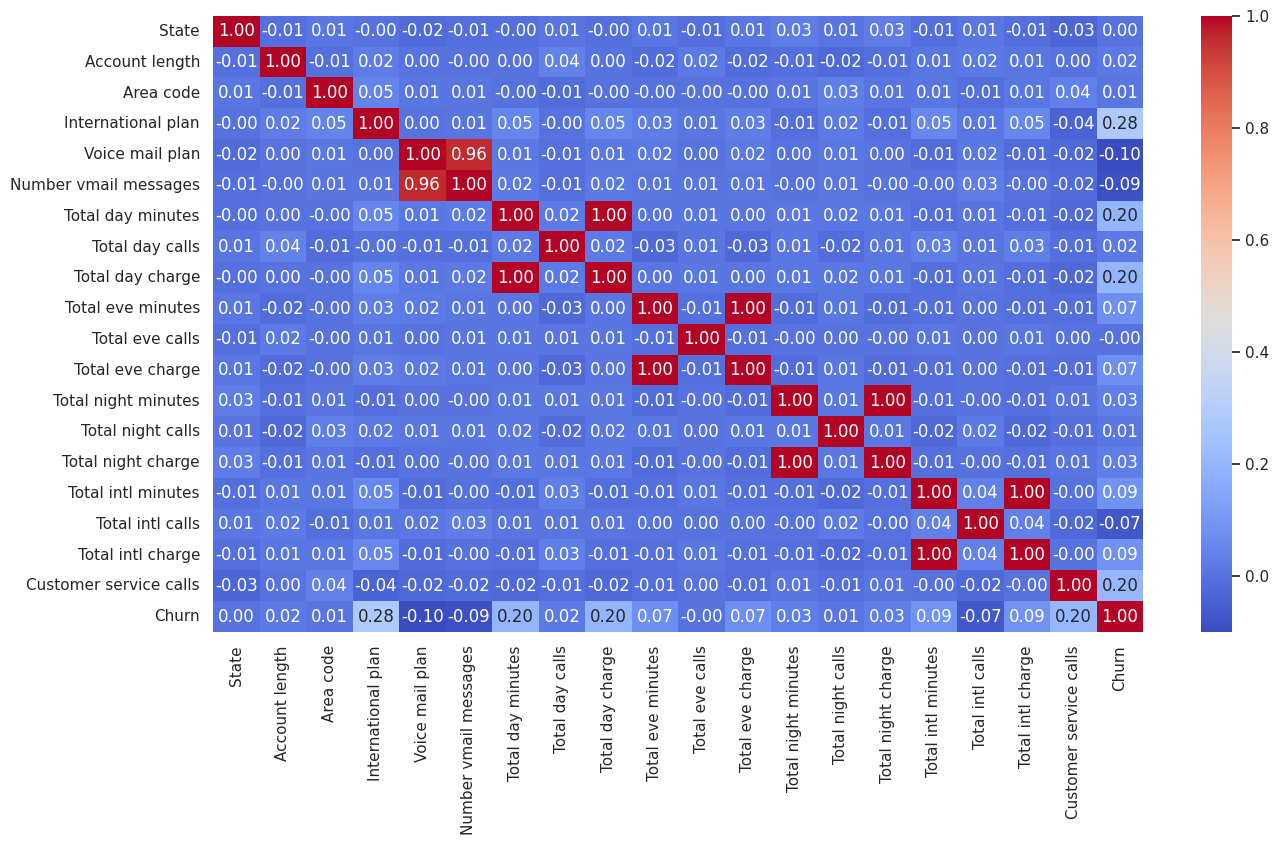

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Create a dictionary to store mappings
label_mappings = {}

for col in categorical_col:
    label_encoder = LabelEncoder()
    df_test[col] = label_encoder.fit_transform(df_test[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mappings
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for State: {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
Mapping for International plan: {'No': 0, 'Yes': 1}
Mapping for Voice mail plan: {'No': 0, 'Yes': 1}
Mapping for Area code: {408: 0, 415: 1, 510: 2}
Mapping for Churn: {False: 0, True: 1}


In [ ]:
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,1,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,1,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,2,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,1,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,1,106,0,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,46,60,1,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,49,159,1,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [ ]:
X_train = df_train.drop('Churn', axis = 1)
X_test = df_test.drop('Churn', axis = 1)
y_train = df_train['Churn']
y_test = df_test['Churn']
# SMOTE 60% for minority
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
def evaluate(model, X_test,y_test, y_pred):
    # Classification Report
    print("TEST RESULTS:\n")
    print('-'*53)
    #Report
    print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))
    res = cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    #Mean accuracy
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    #Standard devitation
    print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
    print('\n')

     # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    confusionmatrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.show()
    print('\n')

    total_samples = confusionmatrix.sum(axis=1)
    # percent for each class
    percentages = (confusionmatrix.T / total_samples).T * 100
    # percent of confusion matrix
    sns.heatmap(percentages, annot=True, cmap="YlGnBu", fmt='.1f')
    plt.show()

# Model RandomForest

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier()

# Training model
rf_model.fit(X_resampled, y_resampled)

# predict test set
y_pred = rf_model.predict(X_test)

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.89      0.78      0.83        95

    accuracy                           0.96       667
   macro avg       0.93      0.88      0.90       667
weighted avg       0.95      0.96      0.95       667


Average Accuracy:	0.9190

Standard Deviation:	0.0263



Confusion Matrix
-----------------------------------------------------


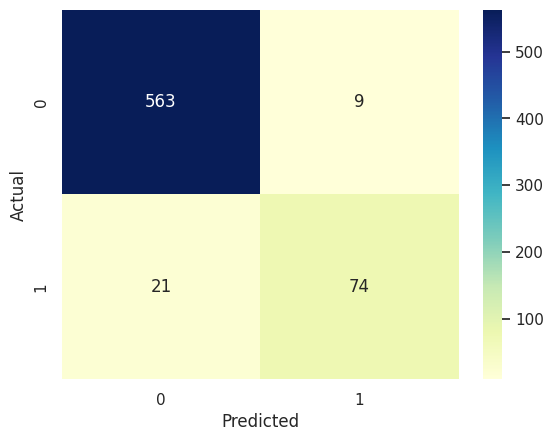

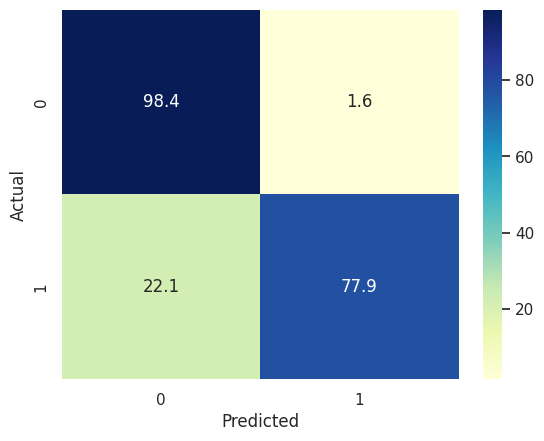

In [ ]:
evaluate(rf_model, X_test, y_test, y_pred)

In [ ]:
# merge data
df_combined = pd.concat([df_train, df_test], ignore_index=True)
X = df_combined.drop('Churn', axis = 1)
y = df_combined['Churn']

In [ ]:
# Cross validation
Kfold = KFold(n_splits= 10, shuffle = True, random_state = 42)
f1_scores = cross_val_score(rf_model,X,y, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(rf_model,X,y, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

f1 of each fold: [0.82191781 0.79069767 0.8        0.86       0.85106383 0.8
 0.77777778 0.80519481 0.85714286 0.83146067]
accuracy of each fold: [0.96407186 0.94011976 0.95808383 0.95195195 0.95195195 0.95195195
 0.93993994 0.95195195 0.96396396 0.96696697]
mean f1 of Fold: 0.819525542669776
mean accuracy of Fold: 0.9540954127780473


# Tunning model

In [ ]:
n_estimators = [50, 100, 150, 200, 250]
maxdepth =[2, 4, 6, 8, 10, 15]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': maxdepth
}

Kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

rf_model = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(rf_model,
                           param_grid,
                           scoring='f1',
                           cv=Kfold,
                           error_score='raise')
result = grid_search.fit(X,y)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.825942 using {'max_depth': 15, 'n_estimators': 100}


In [ ]:
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.019598 (0.026128) with: {'max_depth': 2, 'n_estimators': 50}
0.026935 (0.024480) with: {'max_depth': 2, 'n_estimators': 100}
0.038480 (0.033971) with: {'max_depth': 2, 'n_estimators': 150}
0.008194 (0.016426) with: {'max_depth': 2, 'n_estimators': 200}
0.020037 (0.020076) with: {'max_depth': 2, 'n_estimators': 250}
0.385521 (0.067120) with: {'max_depth': 4, 'n_estimators': 50}
0.380405 (0.065411) with: {'max_depth': 4, 'n_estimators': 100}
0.381061 (0.059514) with: {'max_depth': 4, 'n_estimators': 150}
0.365220 (0.054830) with: {'max_depth': 4, 'n_estimators': 200}
0.387671 (0.068295) with: {'max_depth': 4, 'n_estimators': 250}
0.660715 (0.059341) with: {'max_depth': 6, 'n_estimators': 50}
0.654270 (0.055192) with: {'max_depth': 6, 'n_estimators': 100}
0.657880 (0.059675) with: {'max_depth': 6, 'n_estimators': 150}
0.664048 (0.065772) with: {'max_depth': 6, 'n_estimators': 200}
0.668551 (0.056759) with: {'max_depth': 6, 'n_estimators': 250}
0.781919 (0.048660) with: {'max_depth': 8, 

# Final model

In [ ]:
# Model Random Forest
rf_best = RandomForestClassifier(max_depth = 15, n_estimators = 100)

# Training model
rf_best.fit(X_resampled, y_resampled)

# predict test set
y_pred = rf_best.predict(X_test)

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.87      0.78      0.82        95

    accuracy                           0.95       667
   macro avg       0.92      0.88      0.90       667
weighted avg       0.95      0.95      0.95       667


Average Accuracy:	0.9145

Standard Deviation:	0.0288



Confusion Matrix
-----------------------------------------------------


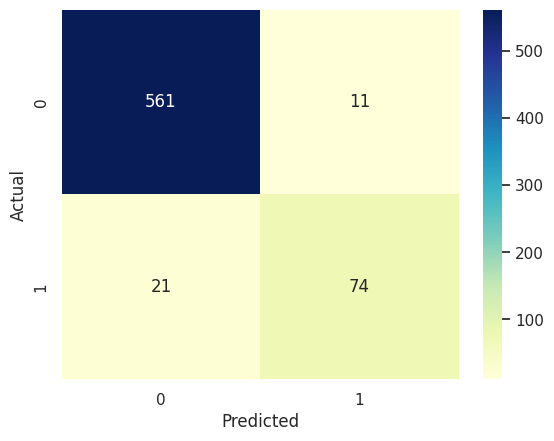

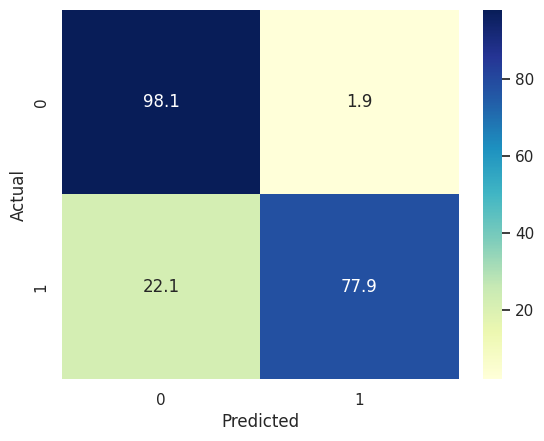

In [ ]:
evaluate(rf_best, X_test, y_test, y_pred)

In [ ]:
# Cross validation
Kfold = KFold(n_splits= 10, shuffle = True, random_state = 42)
f1_scores = cross_val_score(rf_best,X,y, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(rf_best,X,y, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

f1 of each fold: [0.82191781 0.7816092  0.85106383 0.86868687 0.80434783 0.80952381
 0.80434783 0.78947368 0.81081081 0.87912088]
accuracy of each fold: [0.96107784 0.94011976 0.95508982 0.96096096 0.95195195 0.94894895
 0.94894895 0.94894895 0.96096096 0.96396396]
mean f1 of Fold: 0.8220902537935519
mean accuracy of Fold: 0.9540972109834387
